In [1]:
# Import libraries

import os
import glob
from osgeo import gdal
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import scipy.ndimage
import pandas as pd
import datetime as dt
import rasterio as rio
import re
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
from pyhdf.SD import SD, SDC
import pprint
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import csv
import pprint
import h5py 
import gdal
from gdalconst import *
import datetime
import seaborn as sns
from numpy import zeros, newaxis
from scipy import stats

In [2]:
# choose size of boxplots
size = (15,10)

In [3]:
dfsub500 = pd.read_csv("D:\\masters_data\\output\\csv\\df_sub500.csv", header = None)
df500_1500 = pd.read_csv("D:\\masters_data\\output\\csv\\df_500_1500.csv", header = None)
dfabove1500 = pd.read_csv("D:\\masters_data\\output\\csv\\df_above_1500.csv", header = None)

In [4]:
dfsub500.columns = [ 'low_low', 'low_med', 'low_high', 'med_low', 'med_med', 'med_high', 'high_low', 'high_med', 'high_high']
df500_1500.columns = [ 'low_low', 'low_med', 'low_high', 'med_low', 'med_med', 'med_high', 'high_low', 'high_med', 'high_high']
dfabove1500.columns = [ 'low_low', 'low_med', 'low_high', 'med_low', 'med_med', 'med_high', 'high_low', 'high_med', 'high_high']

In [5]:
df500_1500plots = df500_1500.drop(columns=['low_high', 'high_low'])
dfsub500plots = dfsub500.drop(columns=['low_high', 'high_low'])

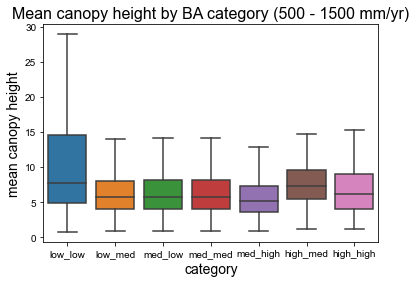

In [6]:
fig = plt.figsize=(15,15)
boxplot = sns.boxplot(data = df500_1500plots,showfliers=False)
boxplot.axes.set_title("Mean canopy height by BA category (500 - 1500 mm/yr)", fontsize=16)
boxplot.set_xlabel("category", fontsize=14)
boxplot.set_ylabel("mean canopy height", fontsize=14)
sns.set(rc={'figure.figsize':size})
plt.show()

In [7]:
# middle line of boxplots does not line up - because boxplot removes outliers?
print("\t\t no. of points \t\t mean canopy(m): ")
print("low_low: \t", 67495- df500_1500['low_low'].isna().sum(), "\t\t\t", round(df500_1500plots['low_low'].mean(),2))
print("low_med: \t", 67495- df500_1500['low_med'].isna().sum(), "\t\t\t", round(df500_1500plots['low_med'].mean(),2))
print("med_low: \t", 67495- df500_1500['med_low'].isna().sum(), "\t\t\t", round(df500_1500plots['med_low'].mean(),2))
print("med_med: \t", 67495- df500_1500['med_med'].isna().sum(), "\t\t\t", round(df500_1500plots['med_med'].mean(),2))
print("med_high: \t", 67495- df500_1500['med_high'].isna().sum(), "\t\t\t", round(df500_1500plots['med_high'].mean(),2))
print("high_med: \t", 67495- df500_1500['high_med'].isna().sum(), "\t\t\t", round(df500_1500plots['high_med'].mean(),2))
print("high_high: \t", 67495- df500_1500['high_high'].isna().sum(), "\t\t\t", round(df500_1500plots['high_high'].mean(),2))

		 no. of points 		 mean canopy(m): 
low_low: 	 45900 			 10.51
low_med: 	 6562 			 6.99
med_low: 	 6812 			 7.2
med_med: 	 6812 			 7.2
med_high: 	 1165 			 6.06
high_med: 	 206 			 8.17
high_high: 	 37 			 7.72


looks like a slight trend. obviously the highest mean canopy is low_low. Med_high is lower than med_low/ med_high. 

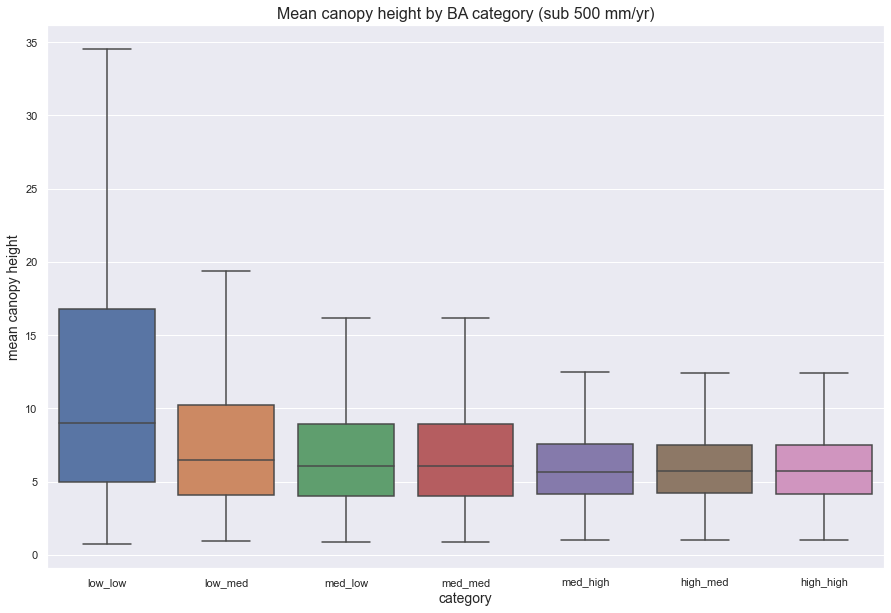

In [8]:
boxplot = sns.boxplot(data = dfsub500plots,showfliers=False)
boxplot.axes.set_title("Mean canopy height by BA category (sub 500 mm/yr)", fontsize=16)
boxplot.set_xlabel("category", fontsize=14)
boxplot.set_ylabel("mean canopy height", fontsize=14)
sns.set(rc={'figure.figsize':size})
plt.show()

In [9]:
# middle line of boxplots does not line up - because boxplot removes outliers?
print("\t\t no. of points \t\t mean canopy(m): ")
print("low_low: \t", 67495- dfsub500['low_low'].isna().sum(), "\t\t\t", round(dfsub500['low_low'].mean(),2))
print("low_med: \t", 67495- dfsub500['low_med'].isna().sum(), "\t\t\t", round(dfsub500['low_med'].mean(),2))
print("med_low: \t", 67495- dfsub500['med_low'].isna().sum(), "\t\t\t", round(dfsub500['med_low'].mean(),2))
print("med_med: \t", 67495- dfsub500['med_med'].isna().sum(), "\t\t\t", round(dfsub500['med_med'].mean(),2))
print("med_high: \t", 67495- dfsub500['med_high'].isna().sum(), "\t\t\t", round(dfsub500['med_high'].mean(),2))
print("high_med: \t", 67495- dfsub500['high_med'].isna().sum(), "\t\t\t", round(dfsub500['high_med'].mean(),2))
print("high_high: \t", 67495- dfsub500['high_high'].isna().sum(), "\t\t\t", round(dfsub500['high_high'].mean(),2))

		 no. of points 		 mean canopy(m): 
low_low: 	 35901 			 11.65
low_med: 	 6850 			 8.33
med_low: 	 9203 			 7.7
med_med: 	 9203 			 7.7
med_high: 	 3922 			 6.62
high_med: 	 8205 			 6.46
high_high: 	 8437 			 6.24


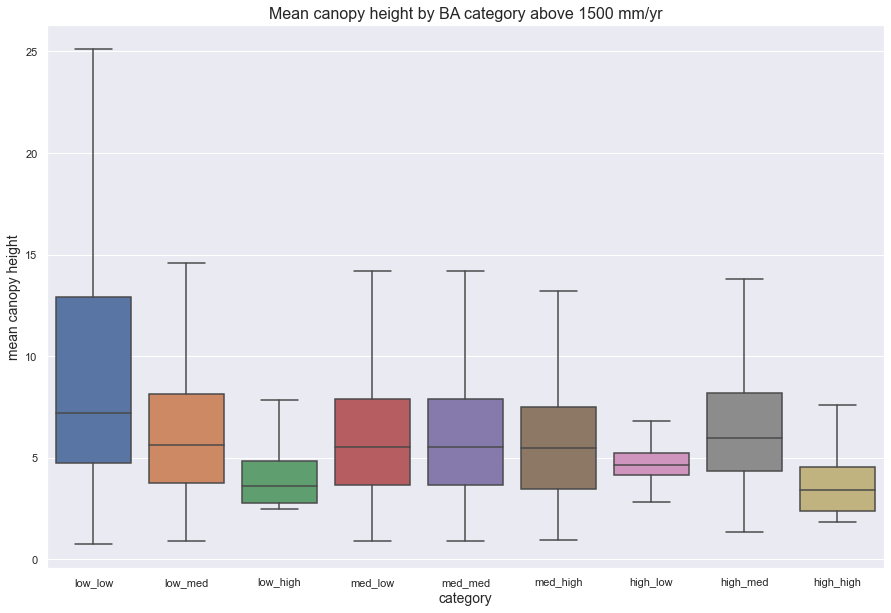

In [10]:
boxplot = sns.boxplot(data = dfabove1500,showfliers=False)
boxplot.axes.set_title("Mean canopy height by BA category above 1500 mm/yr", fontsize=16)
boxplot.set_xlabel("category", fontsize=14)
boxplot.set_ylabel("mean canopy height", fontsize=14)
sns.set(rc={'figure.figsize':size})
plt.show()

In [11]:
# middle line of boxplots does not line up - because boxplot removes outliers?
print("\t\t no. of points \t\t mean canopy(m): ")
print("low_low: \t", 72694- dfabove1500['low_low'].isna().sum(), "\t\t\t", round(dfabove1500['low_low'].mean(),2))
print("low_med: \t", 72694- dfabove1500['low_med'].isna().sum(), "\t\t\t", round(dfabove1500['low_med'].mean(),2))
print("med_low: \t", 72694- dfabove1500['med_low'].isna().sum(), "\t\t\t", round(dfabove1500['med_low'].mean(),2))
print("med_med: \t", 72694- dfabove1500['med_med'].isna().sum(), "\t\t\t", round(dfabove1500['med_med'].mean(),2))
print("med_high: \t", 72694- dfabove1500['med_high'].isna().sum(), "\t\t\t", round(dfabove1500['med_high'].mean(),2))
print("high_med: \t", 72694- dfabove1500['high_med'].isna().sum(), "\t\t\t", round(dfabove1500['high_med'].mean(),2))
print("high_high: \t", 72694- dfabove1500['high_high'].isna().sum(), "\t\t\t", round(dfabove1500['high_high'].mean(),2))

		 no. of points 		 mean canopy(m): 
low_low: 	 57530 			 9.88
low_med: 	 3911 			 7.02
med_low: 	 5494 			 6.72
med_med: 	 5494 			 6.72
med_high: 	 126 			 6.41
high_med: 	 118 			 6.83
high_high: 	 5 			 3.87


In [12]:
# middle line of boxplots does not line up - because boxplot removes outliers?
print("\t\t sub500 \t\t\t\t 500-1500 \t\t\t\t above 1500")
print("\t\t no. of points \t mean canopy:\t\t no. of points \t mean canopy:\t no. of points \t mean canopy: ")
print("low_low: \t", 65111- dfsub500['low_low'].isna().sum(), "\t\t", round(dfsub500['low_low'].mean(),2), "\t\t\t", 67495- df500_1500['low_low'].isna().sum(), "\t\t", round(df500_1500plots['low_low'].mean(),2), "\t\t\t", 72695- dfabove1500['low_low'].isna().sum(), "\t\t", round(dfabove1500['low_low'].mean(),2))
print("low_med: \t", 65111- dfsub500['low_med'].isna().sum(), "\t\t", round(dfsub500['low_med'].mean(),2),  "\t\t\t",67495- df500_1500['low_med'].isna().sum(), "\t\t", round(df500_1500plots['low_med'].mean(),2),"\t\t\t", 72695- dfabove1500['low_med'].isna().sum(), "\t\t", round(dfabove1500['low_med'].mean(),2))
print("med_low: \t", 65111- dfsub500['med_low'].isna().sum(), "\t\t", round(dfsub500['med_low'].mean(),2),  "\t\t\t",67495- df500_1500['med_low'].isna().sum(), "\t\t", round(df500_1500plots['med_low'].mean(),2), "\t\t\t", 72695- dfabove1500['med_low'].isna().sum(), "\t\t", round(dfabove1500['med_low'].mean(),2))
print("med_med: \t", 65111- dfsub500['med_med'].isna().sum(), "\t\t", round(dfsub500['med_med'].mean(),2),  "\t\t\t",67495- df500_1500['med_med'].isna().sum(), "\t\t", round(df500_1500plots['med_med'].mean(),2), "\t\t\t",72695- dfabove1500['med_med'].isna().sum(), "\t\t", round(dfabove1500['med_med'].mean(),2))
print("med_high: \t", 65111- dfsub500['med_high'].isna().sum(), "\t\t", round(dfsub500['med_high'].mean(),2), "\t\t\t",67495- df500_1500['med_high'].isna().sum(), "\t\t", round(df500_1500plots['med_high'].mean(),2), "\t\t\t", 72695- dfabove1500['med_high'].isna().sum(), "\t\t", round(dfabove1500['med_high'].mean(),2))
print("high_med: \t", 65111- dfsub500['high_med'].isna().sum(), "\t\t", round(dfsub500['high_med'].mean(),2), "\t\t\t",67495- df500_1500['high_med'].isna().sum(), "\t\t", round(df500_1500plots['high_med'].mean(),2), "\t\t\t",72695- dfabove1500['high_med'].isna().sum(), "\t\t", round(dfabove1500['high_med'].mean(),2))
print("high_high: \t", 65111- dfsub500['high_high'].isna().sum(), "\t\t", round(dfsub500['high_high'].mean(),2), "\t\t\t",67495- df500_1500['high_high'].isna().sum(), "\t\t", round(df500_1500plots['high_high'].mean(),2), "\t\t\t", 72695- dfabove1500['high_high'].isna().sum(), "\t\t", round(dfabove1500['high_high'].mean(),2))

		 sub500 				 500-1500 				 above 1500
		 no. of points 	 mean canopy:		 no. of points 	 mean canopy:	 no. of points 	 mean canopy: 
low_low: 	 33517 		 11.65 			 45900 		 10.51 			 57531 		 9.88
low_med: 	 4466 		 8.33 			 6562 		 6.99 			 3912 		 7.02
med_low: 	 6819 		 7.7 			 6812 		 7.2 			 5495 		 6.72
med_med: 	 6819 		 7.7 			 6812 		 7.2 			 5495 		 6.72
med_high: 	 1538 		 6.62 			 1165 		 6.06 			 127 		 6.41
high_med: 	 5821 		 6.46 			 206 		 8.17 			 119 		 6.83
high_high: 	 6053 		 6.24 			 37 		 7.72 			 6 		 3.87


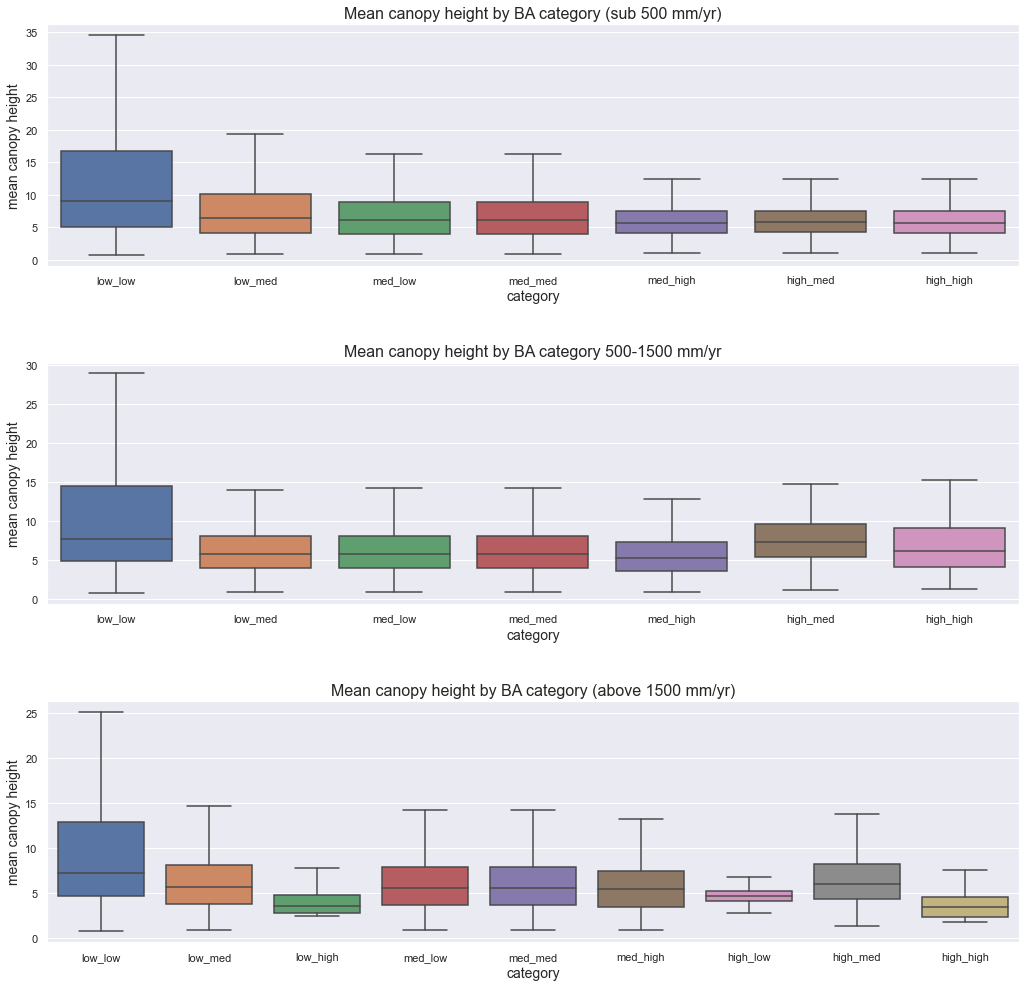

In [28]:
size_3 = (20, 15)
plt.subplot(3,1,1)
boxplot = sns.boxplot(data = dfsub500plots,showfliers=False)
boxplot.axes.set_title("Mean canopy height by BA category (sub 500 mm/yr)", fontsize=16)
boxplot.set_xlabel("category", fontsize=14)
boxplot.set_ylabel("mean canopy height", fontsize=14)
sns.set(rc={'figure.figsize':size})

plt.subplot(3,1,2)
boxplot = sns.boxplot(data = df500_1500plots,showfliers=False)
boxplot.axes.set_title("Mean canopy height by BA category 500-1500 mm/yr", fontsize=16)
boxplot.set_xlabel("category", fontsize=14)
boxplot.set_ylabel("mean canopy height", fontsize=14)
sns.set(rc={'figure.figsize':size})

plt.subplot(3,1,3)
boxplot = sns.boxplot(data = dfabove1500,showfliers=False)
boxplot.axes.set_title("Mean canopy height by BA category (above 1500 mm/yr)", fontsize=16)
boxplot.set_xlabel("category", fontsize=14)
boxplot.set_ylabel("mean canopy height", fontsize=14)
sns.set(rc={'figure.figsize':size_3})

plt.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.show()

In [14]:
# now want to concatonate all of them into an all_data dataframe. Add rainfall band first and use it as a hue value. 

In [15]:
all_data = pd.read_csv("D:\\masters_data\\output\\csv\\all_data.csv", header =None)
all_data.columns = ["BA_categories", "rainfall_bands", "mean_canopy"]

In [16]:
all_data['zscore'] = np.abs(stats.zscore(all_data))

SyntaxError: invalid syntax (<ipython-input-16-9b6fd68eac02>, line 1)

In [16]:
all_data

,BA_categories,rainfall_bands,mean_canopy
0,low_low,sub500,5.20
1,low_low,sub500,3.83
2,low_low,sub500,5.29
3,low_low,sub500,5.59
4,low_low,sub500,7.16
...,...,...,...
205296,high_high,above_1500,7.62
205297,high_high,above_1500,4.07
205298,high_high,above_1500,2.21
205299,high_high,above_1500,2.80


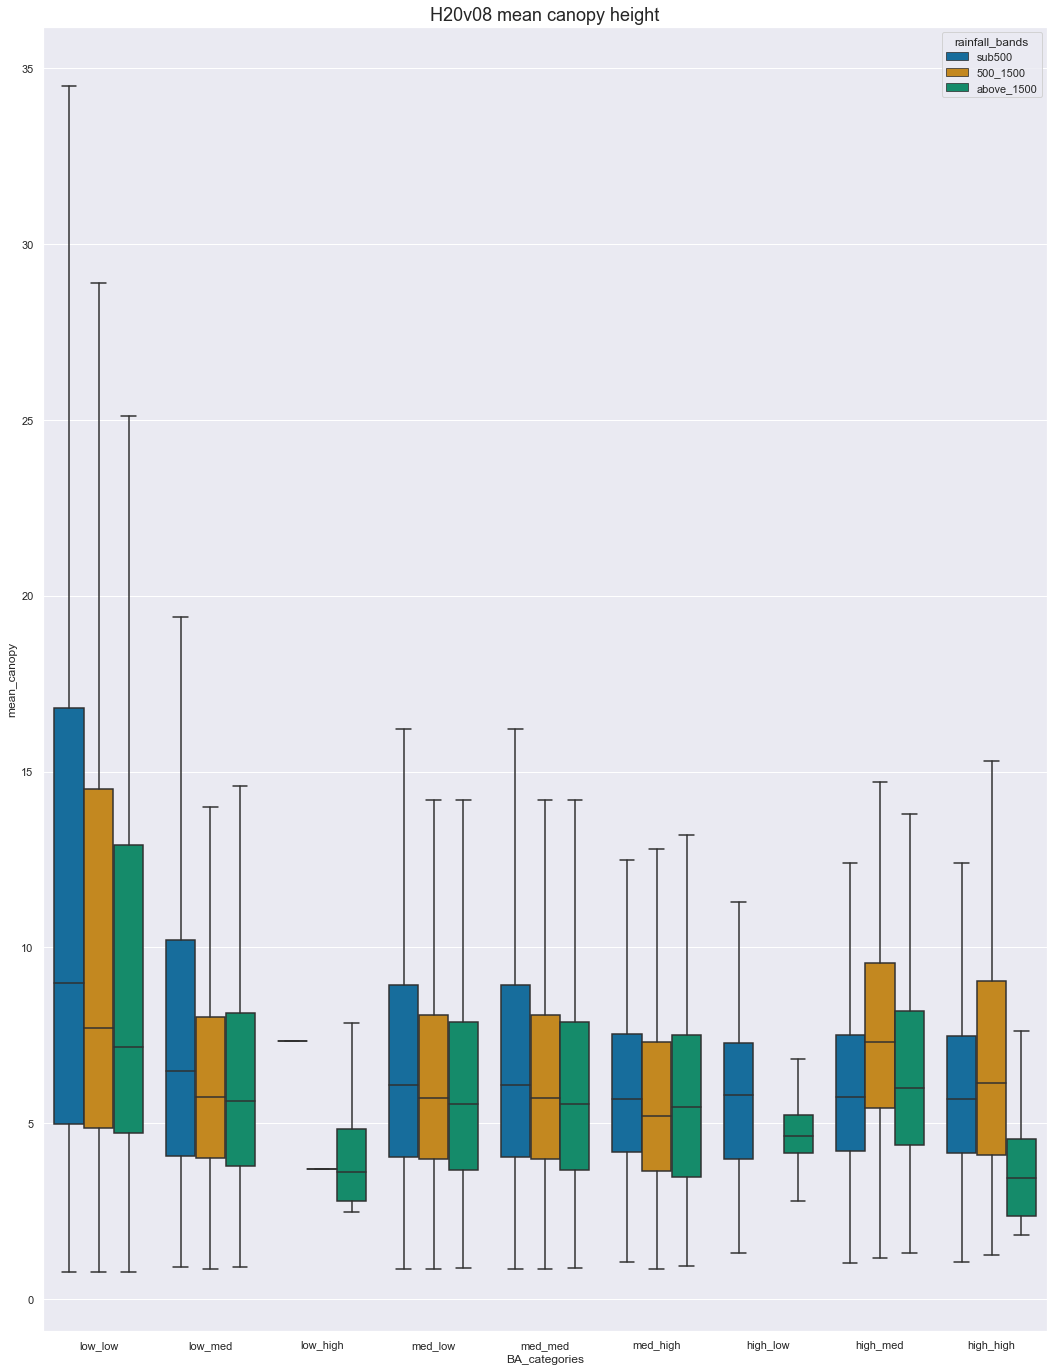

In [24]:
ax = sns.boxplot(y='mean_canopy', x='BA_categories', 
                 data=all_data,  showfliers=False,
                 palette="colorblind",
                 hue='rainfall_bands')
ax.set_title('H20v08 mean canopy height', fontsize =18)
sns.set(rc={'figure.figsize':size})
plt.show()

In [31]:
no_presentable_data = all_data[(all_data['BA_categories'] == 'low_high')].index
all_presentable_data = all_data.replace(no_presentable_data, np.nan)

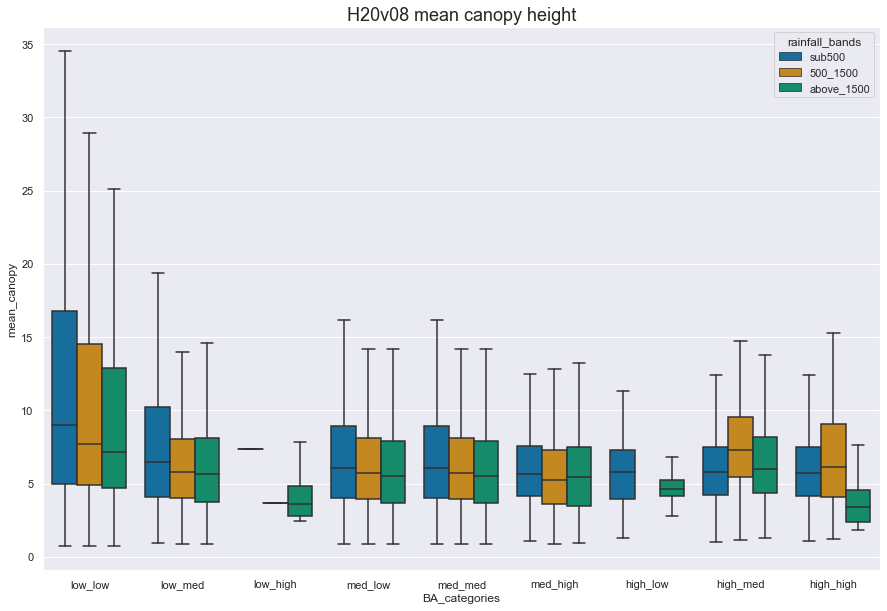

In [32]:
ax = sns.boxplot(y='mean_canopy', x='BA_categories', 
                 data=all_presentable_data,  showfliers=False,
                 palette="colorblind",
                 hue='rainfall_bands')
ax.set_title('H20v08 mean canopy height', fontsize =18)
sns.set(rc={'figure.figsize':size})
plt.show()

C:\Users\samgr\miniconda3\envs\GDAL_test\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


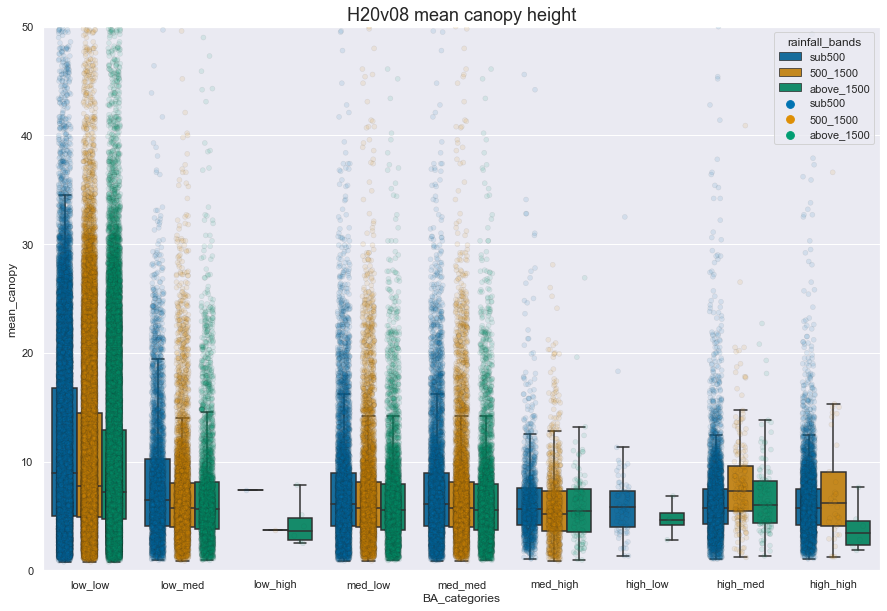

In [38]:
ylim = (0, 50)
ax = sns.boxplot(y='mean_canopy', x='BA_categories', 
                 data=all_presentable_data,  showfliers=False,
                 palette="colorblind",
                 hue='rainfall_bands')
ax = sns.stripplot(y='mean_canopy', x='BA_categories', 
                 data=all_presentable_data,
                 palette="colorblind",  split=True, linewidth=0.5,alpha=0.1,jitter=0.2,color='k',
                 hue='rainfall_bands')
ax.set_title('H20v08 mean canopy height', fontsize =18)
ax.set(ylim = ylim)
sns.set(rc={'figure.figsize':size})
plt.show()

In [33]:
print(len(all_data))

205301


clearly outliers aren't right?

C:\Users\samgr\miniconda3\envs\GDAL_test\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


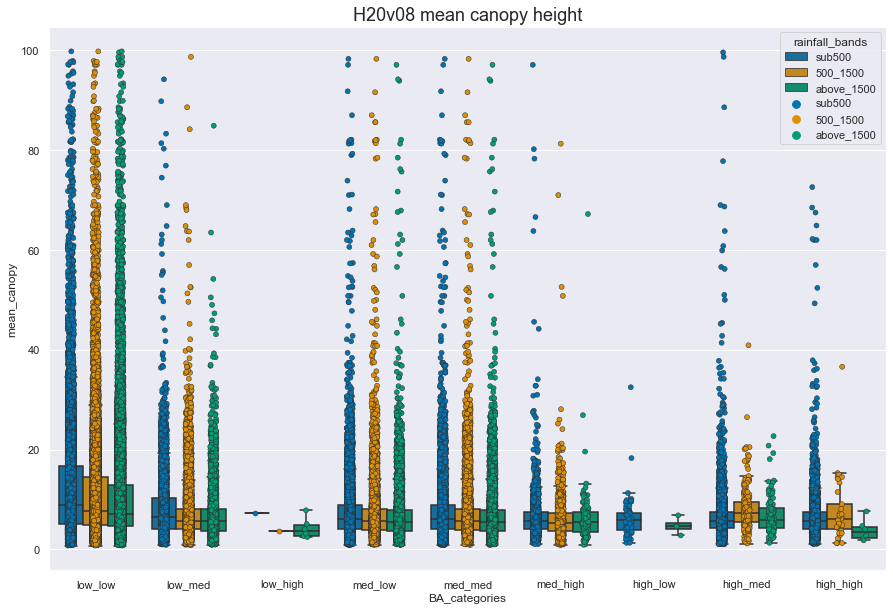

In [21]:

ax = sns.boxplot(y='mean_canopy', x='BA_categories', 
                 data=all_presentable_data,  showfliers=False,
                 palette="colorblind",
                 hue='rainfall_bands')
ax = sns.stripplot(y='mean_canopy', x='BA_categories', 
                 data=all_presentable_data,
                 palette="colorblind", jitter=True, split=True, linewidth=0.5,
                 hue='rainfall_bands')

ax.set_title('H20v08 mean canopy height', fontsize =18)
sns.set(rc={'figure.figsize':size})
plt.show()

In [22]:
First_BA_500_1500 = pd.read_csv("D:\\masters_data\\rainfall\\Rainfall_bands\\H20_V08\\first_BA_500-1500_H20V08.csv", header=None)
Second_BA_500_1500 = pd.read_csv("D:\\masters_data\\rainfall\\Rainfall_bands\\H20_V08\\second_BA_500-1500_H20V08.csv", header=None)
First_BA_sub500 = pd.read_csv("D:\\masters_data\\rainfall\\Rainfall_bands\\H20_V08\\first_BA_sub500_H20V08.csv", header=None)
Second_BA_sub500 = pd.read_csv("D:\\masters_data\\rainfall\\Rainfall_bands\\H20_V08\\second_BA_sub500_H20V08.csv", header=None)
First_BA_above_1500 = pd.read_csv("D:\\masters_data\\rainfall\\Rainfall_bands\\H20_V08\\first_BA_above1500_H20V08.csv", header=None)
Second_BA_above_1500 = pd.read_csv("D:\\masters_data\\rainfall\\Rainfall_bands\\H20_V08\\second_BA_above1500_H20V08.csv", header=None)

In [25]:
BA_500_1500 = First_BA_500_1500 +Second_BA_500_1500
BA_sub500 = First_BA_sub500 + Second_BA_sub500
BA_above1500 = First_BA_above_1500 + Second_BA_above_1500

In [26]:
rainfall_map = np.zeros((2400, 2400))

mask_sub50 = (np.greater(BA_sub500, BA_500_1500) | np.array_ & np.greater(BA_sub500, BA_above1500)
mask_500_1500 = np.greater(BA_500_1500, BA_sub500) & np.greater(BA_500_1500, BA_above1500)
mask_above1500 = np.greater(BA_above1500, BA_sub500) & np.greater(BA_above1500, BA_500_1500)

SyntaxError: invalid syntax (<ipython-input-26-b0be455de485>, line 4)

In [ ]:
rainfall_map[mask_sub50 == 1] = 1
rainfall_map[mask_500_1500 == 1] = 2
rainfall_map[mask_above1500 == 1] = 3

In [ ]:
rainfall_map[rainfall_map == 0] = np.nan
f, axes = plt.subplots(1,1,figsize=(8,8))
plt.title("rainfall map")
color_map = plt.imshow(rainfall_map)
divider = make_axes_locatable(axes) 
cax = divider.append_axes("right", size ="5 %")
img = axes.imshow(rainfall_map, cmap = 'jet')
plt.colorbar(img, cax = cax)
color_map.set_cmap('jet')
divider = make_axes_locatable(axes) 
cax = divider.append_axes("right", size ="5 %")
color_bar = plt.colorbar(img, cax = cax) 
plt.figure(figsize= (32,32), dpi=100)
plt.show()